# <center>Hotel Booking Cancellation Prediction - EDA + ML Classification</center>

<hr style="border: none; border-top: 1px solid #000;">

<center>
    <span>
        Created by <b>Ian Yap</b>
        &emsp;|&emsp;
        Data from <a href="https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data"><b>Kaggle</b></a>
        &nbsp;
    </span>
</center>

<br>

<center>
    <span>
        <a href="https://www.linkedin.com/in/ian-yap-052870139/"><b>LinkedIn</b></a>
        &emsp;|&emsp;
        <a href="https://xiyap.github.io/"><b>Portfolio</b></a>
    </span>
</center>
    
<hr style="border: none; border-top: 1px solid #000;">


## Table of Contents

1. [Background](#Background)
2. [Objectives](#Objectives)
3. [Feature Information](#Feature_Information)
4. [Import Libraries](#Import_Libraries)
5. [Data Loading](#Data_Loading)
6. [Feature Engineering](#Feature_Engineering)
7. [Exploratory Data Analysis (EDA) & Visualization](#Exploratory_Data_Analysis_(EDA)_&_Visualization)
    - [Feature Data Analysis](#Feature_Data_Analysis)
    - [Feature Relationship Analysis](#Feature_Relationship_Analysis)
    - [Data Correlation](#Data_Correlation)
8. [Data Preparation](#Data_Preparation)
9. [Model Development](#Model_Development)
    - [Logistic Regression with GridSearch (grid_log)](#Logistic_Regression_with_GridSearch_(grid_log))
    - [KNN with GridSearch (grid_knn)](#KNN_with_GridSearch_(grid_knn))
    - [Random Forest Classifier with GridSearch (grid_rfc)](#Random_Forest_Classifier_with_GridSearch_(grid_rfc))
    - [SVC with GridSearch (grid_svc)](#SVC_with_GridSearch_(grid_svc))
    - [Gradient Boost with GridSearch (grid_gb)](#Gradient_Boost_with_GridSearch_(grid_gb))
    - [AdaBoost with GridSearch (grid_ab)](#AdaBoost_with_GridSearch_(grid_ab))
    - [Extreme Gradient Boost with GridSearch (grid_xgb)](#Extreme_Gradient_Boost_with_GridSearch_(grid_xgb))
    - [Gaussian NB (gnb)](#Gaussian_NB_(gnb))
10. [Model Comparison](#Model_Comparison)
11. [Conclusion](#Conclusion)
12. [Recommendation](#Recommendation)
13. [Final Model Deployment](#Final_Model_Deployment)

## <a id='Background' href=#1> Background </a>

In the hospitality and tourism industry, a common issue faced by hotels and resorts are room cancellations by guests, especially last minute cancellations. This issue causes opportunity losses to the hotel as the room is now vacant unless a last minute booking occurs. As the rooms still incurs fixed costs such as utilities, staff and maintenance costs regardless of its occupancy, the cancelled room will indirectly reduce the profit of the hotel.

The negative impact of this issue is even more apparent in smaller hotels. Smaller hotels often operate with a leaner staff, which means in the event a room cancellation occurs, the hotel would be overstaffed for the number of guests, leading to increased labor costs relative to revenue. Furthermore, smaller hotels typically orders food and beverages based on the anticipated demand. A last minute cancellation would cause food wastage and increases the hotel running cost.

In this project, a dataset containing information about the booking and guests such as number of people, number of nights, room type, lead time, arrival date, source of booking, price per room, repeating guests, booking status and more will be used. Based on this dataset, a classification model will be developed to assist hotels to accurately predict the chances of a booking getting cancelled to ensure proper planning can occur.

Besides predicting the room cancellations, the data obtained can also be used to gain insight on guests booking patterns and preferences. This insight can be used to eliminate wastages to have a leaner operation in attempt to reduce the opportunity losses in the event a last minute cancellation occur. The data is also valuable for the marketing team to determine the right time to implement marketing strategies to help increase hotel profit.

## <a id='Objectives' href=#1> Objectives </a>

The *main* objective of this project is to **develop a predictive model which can predict the chances of a booking getting cancelled.**

The *secondary* objectives of this project are:
1. To identify the **determining factor which impacts the room cancellation rate.**
2. To assist the hotel in **reducing opportunity losses** due to last minute cancellations.
3. To **determine suitable marketing strategies** across the year to increse profit.

## <a id='Feature_Information' href=#1> Feature Information </a>

- **Booking_ID**: Unique identifier for each booking
- **no_of_adults**: Number of adults staying
- **no_of_children**: Number of children staying
- **no_of_weekend_nights**: Number of weekend nights booked
- **no_of_week_nights**: Number of weekday nights booked
- **type_of_meal_plan**: Type of meal plan during stay
- **required_car_parking_space**: Car parking space required? (0: No, 1: Yes)
- **room_type_reserved**: Type of room reserved
- **lead_time**: Number of days between booking and arrival date
- **arrival_year**: Year of arrival date
- **arrival_month**: Month of arrival date
- **arrival_date**: Day of arrival date
- **market_segment_type**: Booking method
- **repeated_guest**: Repeating guest? (0: No, 1: Yes)
- **no_of_previous_cancellations**: Number of previous bookings cancelled by guest
- **no_of_previous_bookings_not_canceled**: Number of previous bookings not cancelled by guest
- **avg_price_per_room**: Average price per room during guest stay
- **no_of_special_requests**: Number of special request made by guest
- **booking_status**: Cancellation status of booking

## <a id='Import_Libraries' href=#1> Import Libraries </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## <a id='Data_Loading' href=#1> Data Loading </a>

Loading the dataset to be used for analysis and model development.

In [2]:
df_original = pd.read_csv('bookings.csv')
df = df_original.copy()

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

## <a id='Feature_Engineering' href=#1> Feature Engineering </a>

Data wrangling is performed to clean the dataset so that it is suitable for the predictive model.

First, we will check for any duplicated data and remove them as it will affect the data analysis and training of the predictive model.

In [5]:
print(f'Number of duplicated rows: {df.duplicated().sum()}')
# df.drop_duplicates(inplace = True)
# print(f'Number of duplicated rows: {df.duplicated().sum()}')

Number of duplicated rows: 0


Next, we will check the shape of the dataset and its status.

Looks like our dataset has 36275 rows, 19 columns, no missing data and the data types of each attributes are correct.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
missing_value = df.isna().sum()
missing_value_percentage = (missing_value / len(df)) * 100

pd.DataFrame({'Total Missing Value': missing_value, 'Missing Percentage': missing_value_percentage})

,Total Missing Value,Missing Percentage
Booking_ID,0,0.0
no_of_adults,0,0.0
no_of_children,0,0.0
no_of_weekend_nights,0,0.0
no_of_week_nights,0,0.0
type_of_meal_plan,0,0.0
required_car_parking_space,0,0.0
room_type_reserved,0,0.0
lead_time,0,0.0
arrival_year,0,0.0


We explore the dataset using descriptive statistics to gain insights on the data.

In [8]:
num_col = df.select_dtypes(include = 'number').describe()
num_col.transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [9]:
cat_col = df.select_dtypes(include = 'object').describe()
cat_col.transpose()

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


The unique identifier 'Booking_ID' is removed as it is not important for our analysis.

In [10]:
# Remove unique identifier from DF
df.drop('Booking_ID', axis = 1, inplace = True)

cat_col = df.select_dtypes(include = 'object').describe()
cat_col.transpose()

,count,unique,top,freq
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [11]:
for col in cat_col:
    print(f'Unique values in column {col}: \
    \n{df[col].unique()} \
    \n')

Unique values in column type_of_meal_plan:     
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']     

Unique values in column room_type_reserved:     
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']     

Unique values in column market_segment_type:     
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']     

Unique values in column booking_status:     
['Not_Canceled' 'Canceled']     



## <a id='Exploratory_Data_Analysis_(EDA)_&_Visualization' href=#1> Exploratory Data Analysis (EDA) & Visualization </a>

In this section we will explore and gain insights to the data through visualization.

### <a id='Feature_Data_Analysis' href=#1> Feature Data Analysis </a>

First, we explore the features in the dataset.

In [12]:
feature_all = list(df.columns)
feature_cat = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_special_requests', 'booking_status']

feature_num = list(set(feature_all) - set(feature_cat))

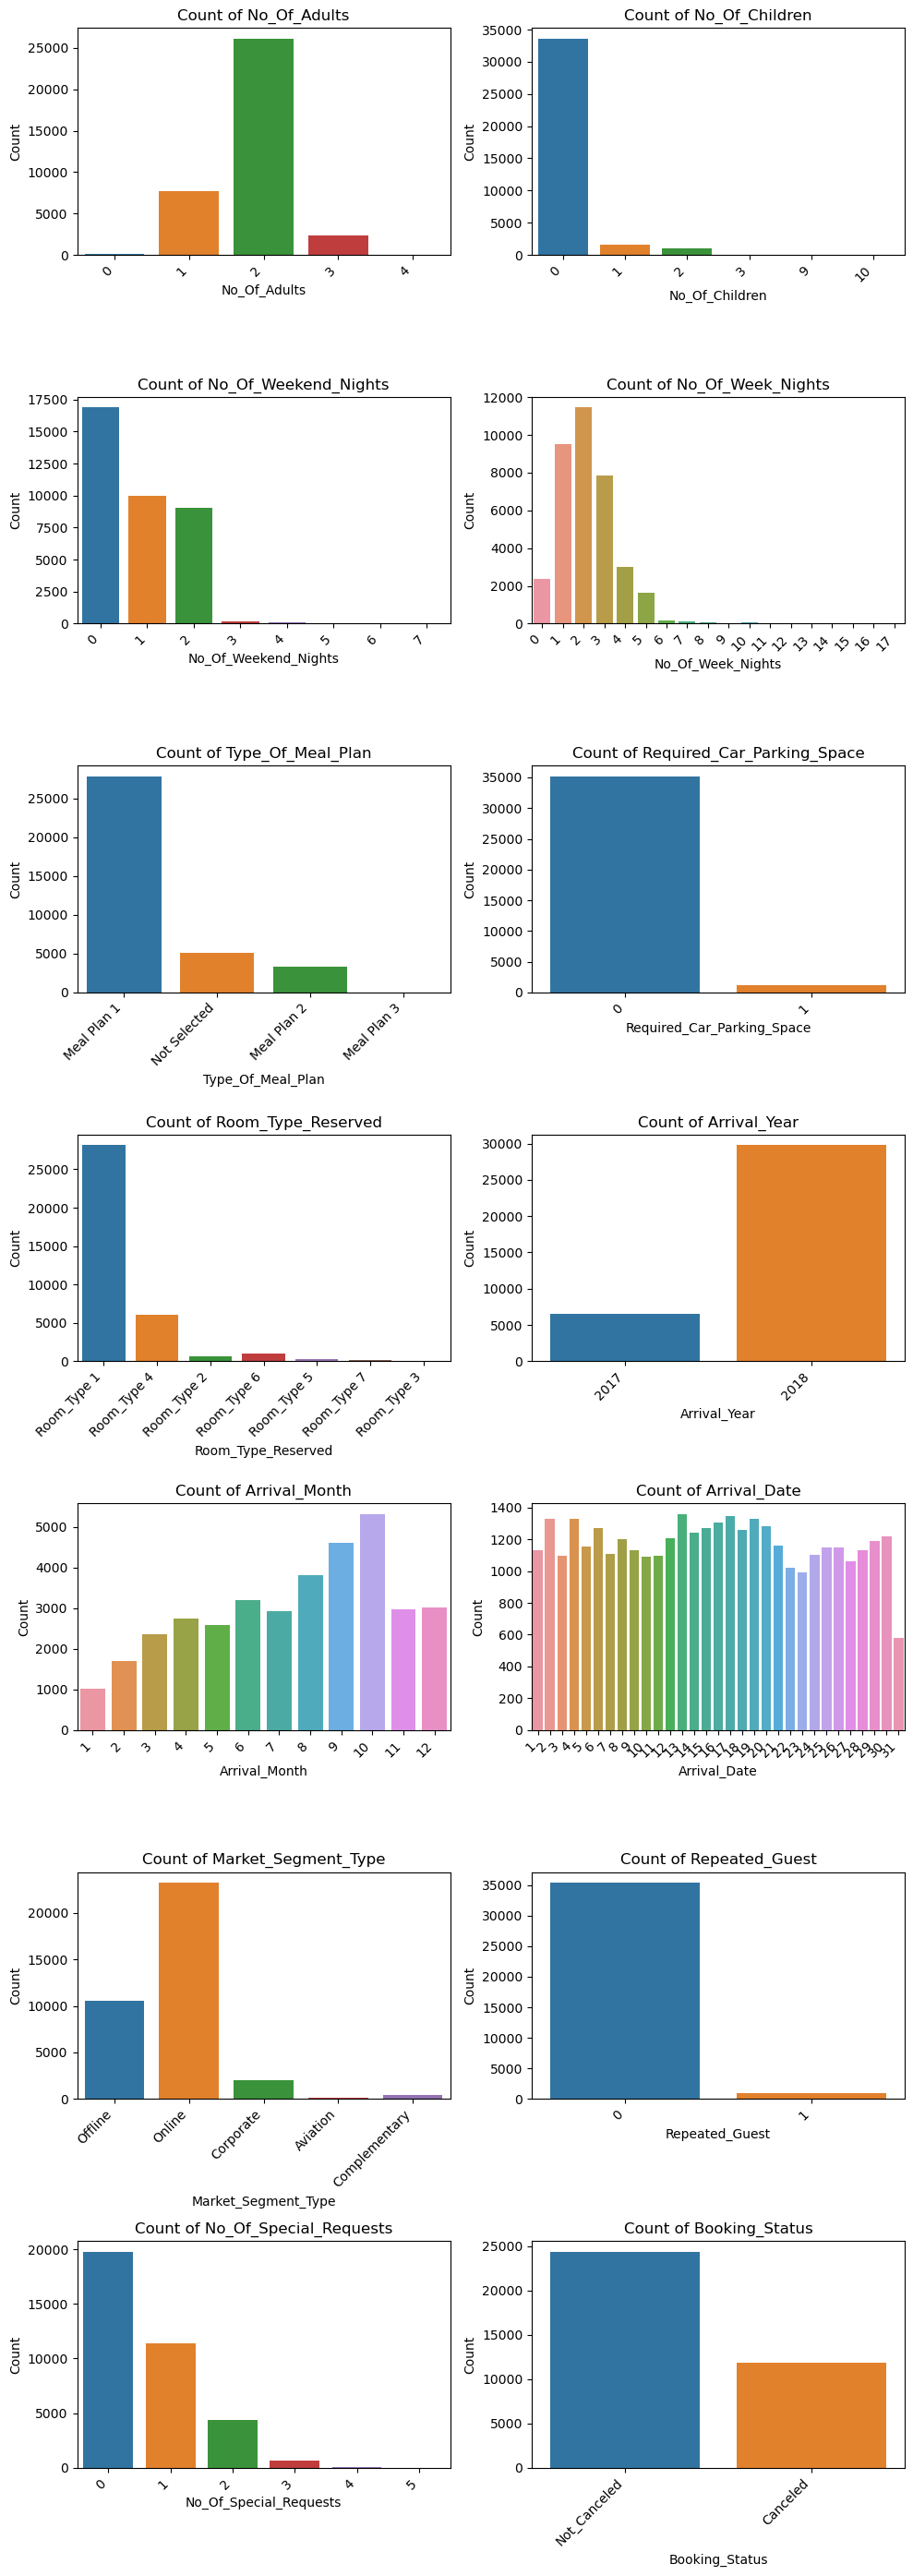

In [13]:
# Count plot for categorical features
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 8*3.5))
row_col = [(0, 0), (0, 1), 
           (1, 0), (1, 1), 
           (2, 0), (2, 1), 
           (3, 0), (3, 1),
           (4, 0), (4, 1), 
           (5, 0), (5, 1), 
           (6, 0), (6, 1), ]

for i, cat_col_name in enumerate(feature_cat):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.countplot(data = df, x = cat_col_name, ax = ax)
    ax.set_title(f'Count of {cat_col_name.title()}')
    ax.set_xlabel(cat_col_name.title())
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
    
# fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

By plotting a count plots for the categorical features, we are able to visualize the distribution for each categorical feature.

Observation:
- The most common bookings are for **2 adults with 0 children, presumably young couples.**
- Meal plan 1 is by far the most popular selection while **barely anyone selects meal plan 3.**
- Room type 1 is by far the most popular choice while **barely anyone books room type 3.**
- **August to October is peak season** while **January to March is off season.**
- Most **bookings are done online** as expected.
- Most guests are **first timers.**
- Around **33% of the total bookings are canceled.**

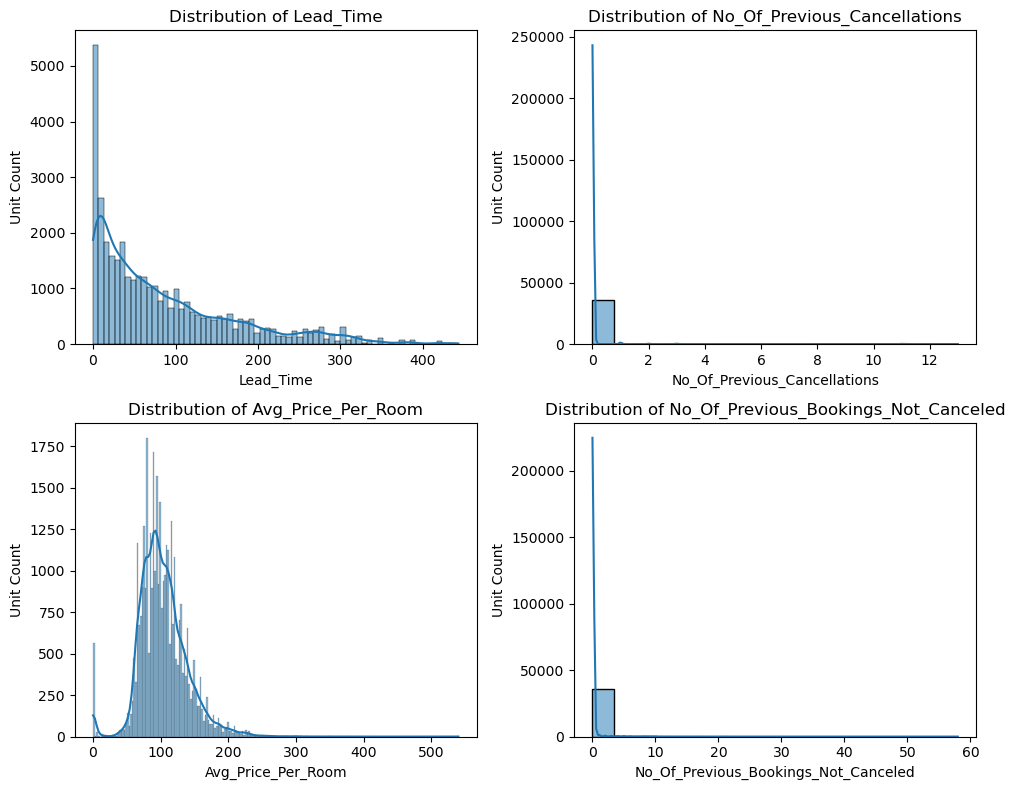

In [14]:
# Histogram for numerical features
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))
row_col = [(0, 0), (0, 1), (1, 0), (1, 1)]

for i, num_col_name in enumerate(feature_num):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.histplot(data = df, x = num_col_name, kde = True, ax = ax)
    ax.set_title(f'Distribution of {num_col_name.title()}')
    ax.set_xlabel(num_col_name.title())
    ax.set_ylabel('Unit Count')

# fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

By plotting a histograms for the numerical features, we can visualize the distribution for each discrete and continuous feature.

Observation:
- Most of the **bookings are done last minute** with minimal lead time.

We will further explore the relationship of lead time and booking status.

### <a id='Feature_Relationship_Analysis' href=#1> Feature Relationship Analysis </a>

Next, we analyse the relationships between the features.

In [15]:
print(f'Numerical Features: {feature_num}\n')
print(f'Categorical Features: {feature_cat}')

Numerical Features: ['lead_time', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_previous_bookings_not_canceled']

Categorical Features: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_special_requests', 'booking_status']


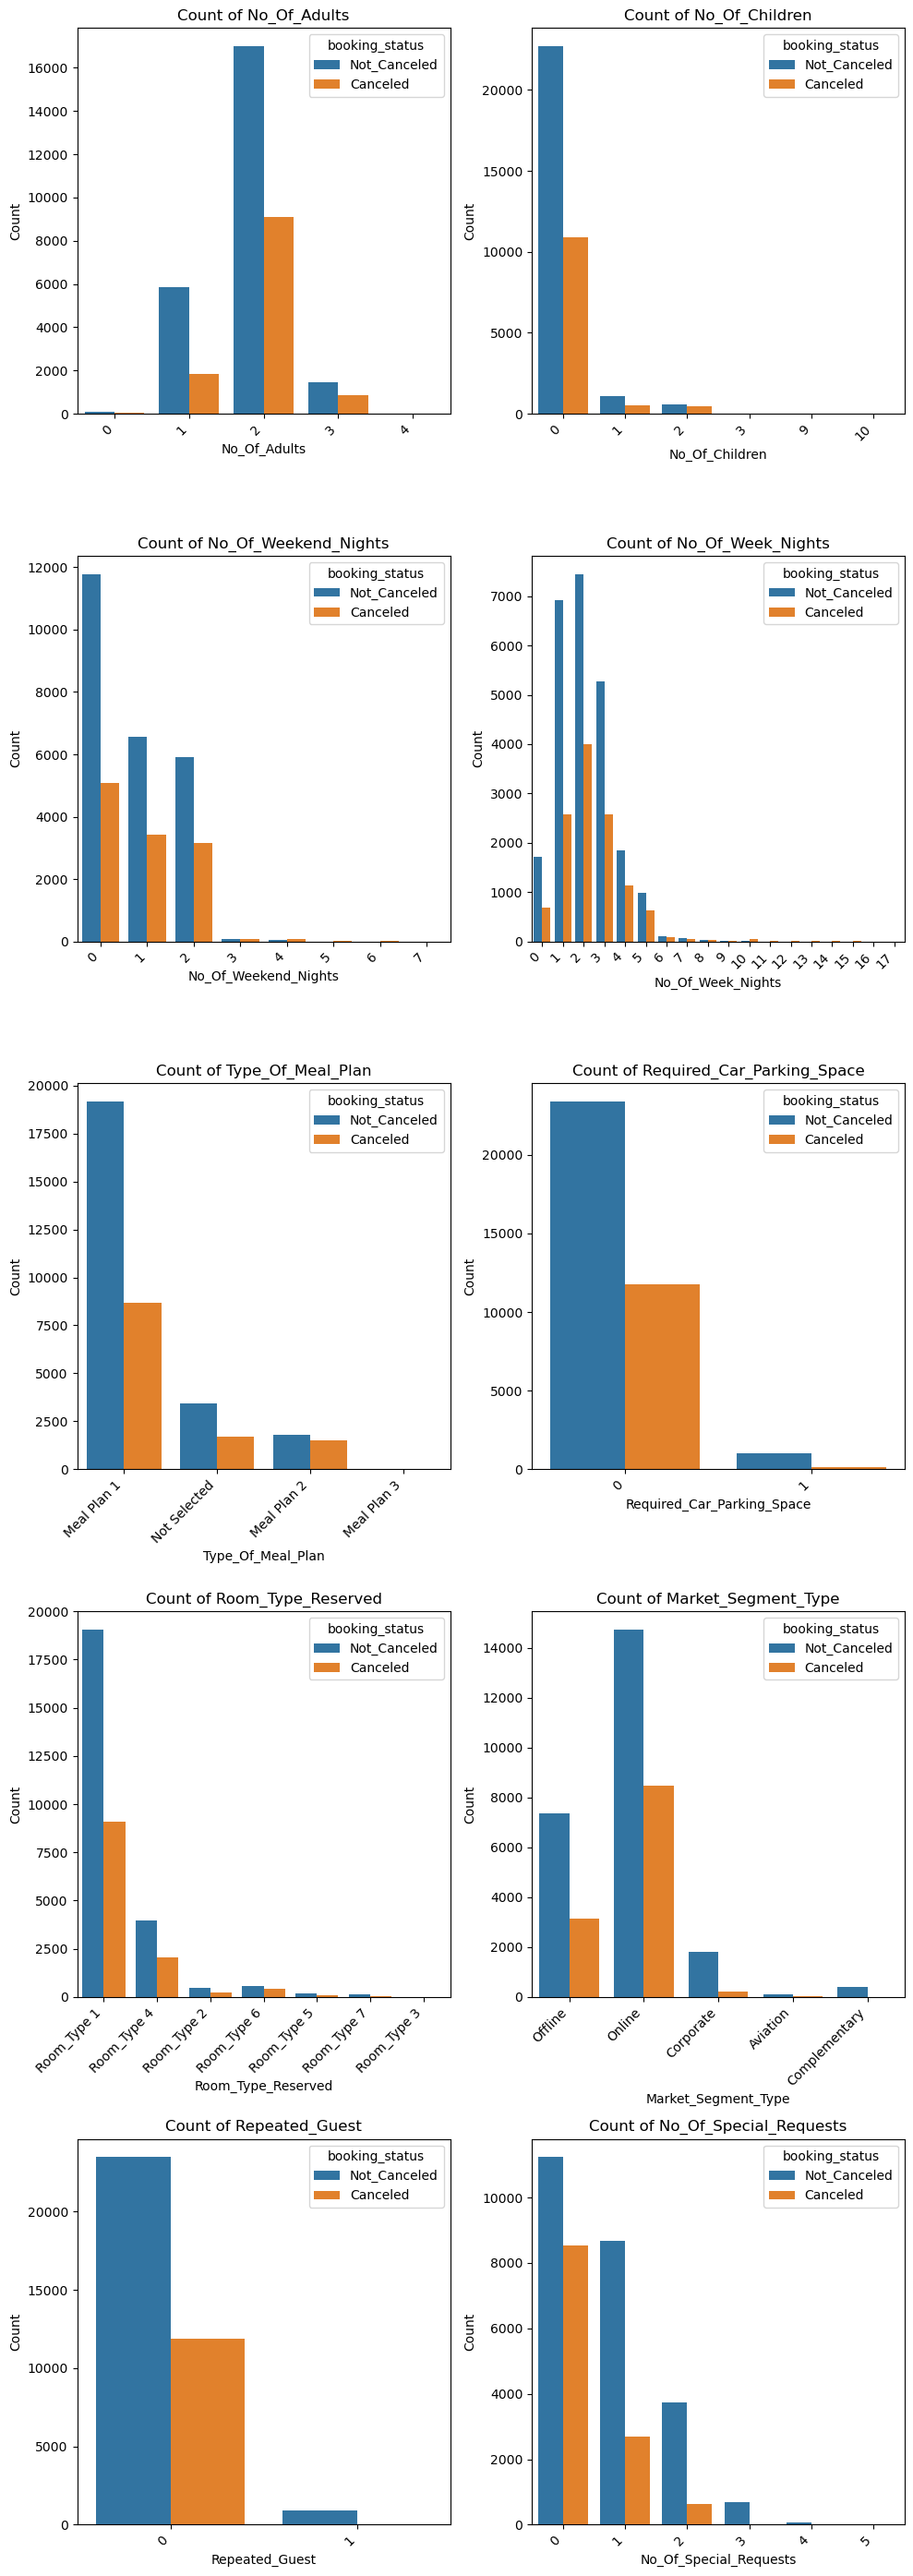

In [16]:
# Count plot for categorical features
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (10, 8*3.5))
row_col = [(0, 0), (0, 1), 
           (1, 0), (1, 1), 
           (2, 0), (2, 1), 
           (3, 0), (3, 1),
           (4, 0), (4, 1)]

for i, cat_col_name in enumerate(feature_cat[:7] + feature_cat[10:13]):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.countplot(data = df, x = cat_col_name, hue = 'booking_status', ax = ax)
    ax.set_title(f'Count of {cat_col_name.title()}')
    ax.set_xlabel(cat_col_name.title())
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
    
# fig.delaxes(axes[5, 1])
plt.tight_layout()
plt.show()

By plotting count plots displaying the proportion of cancellations against categorical features, we can visualize the relationship between the 'booking_status' against all feature attributes.

Observation:
- The ratio of **cancellation is lower for solo travellers (1 adult).**
- It looks like **repeating guest generally does not cancel their bookings**, we will look into the numbers in detail.
- Bookings with **no special request have a high cancellation rate** compared to those with requests.
- All other feature attributes shows a cancellation ratio of around 1:3 which is similar to the 'booking_status' ratio.

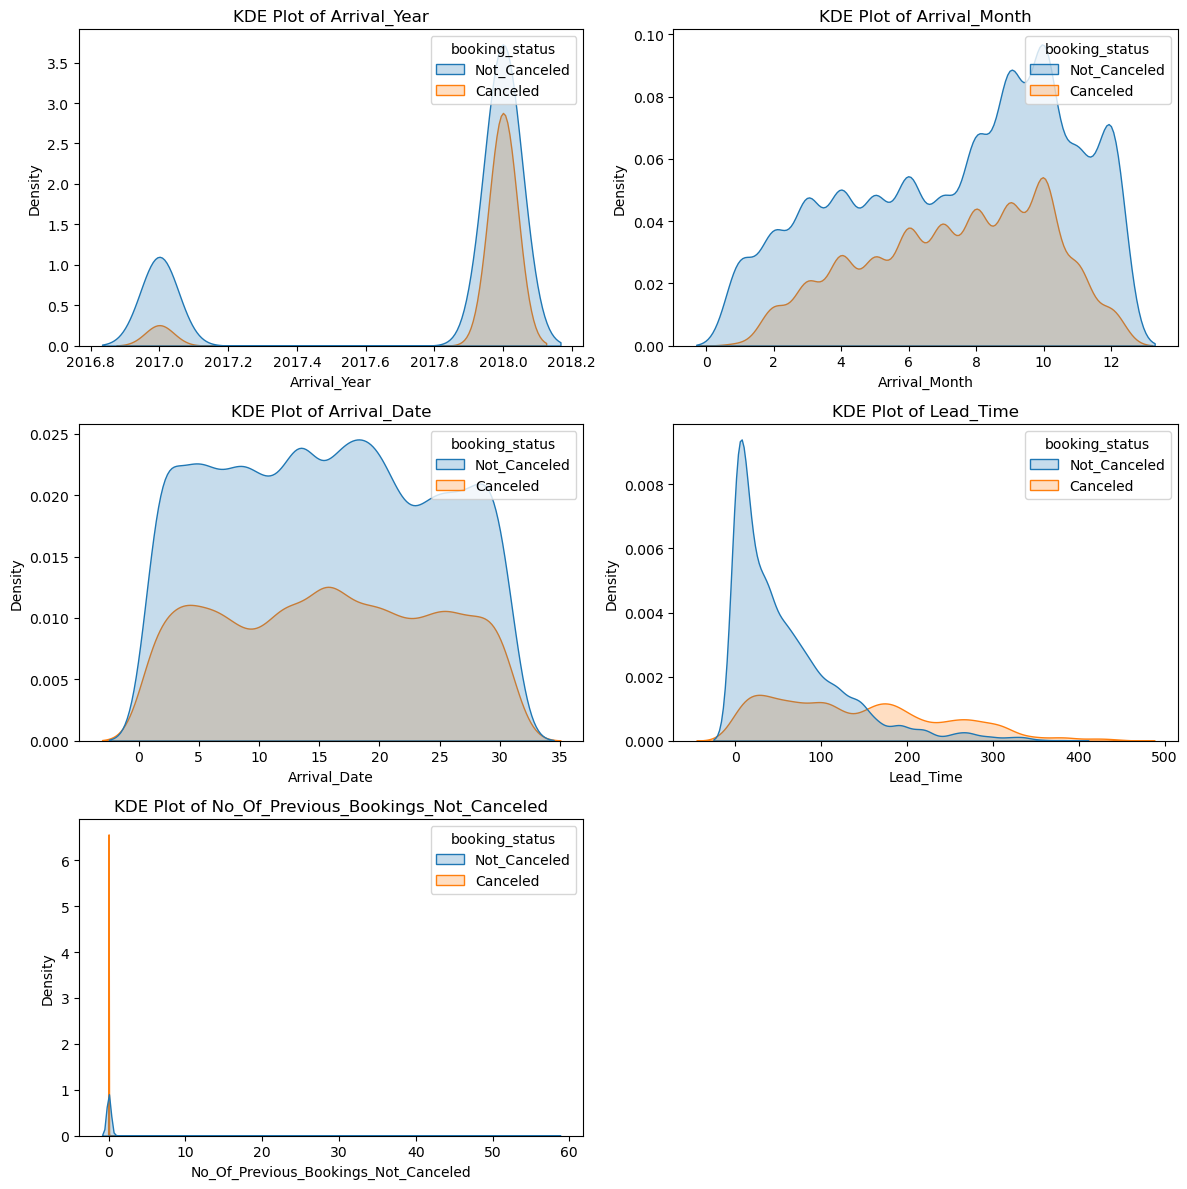

In [17]:
# KDE plot for continuous features
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 12))
row_col = [(0, 0), (0, 1), 
           (1, 0), (1, 1),
           (2, 0), (2, 1)]

for i, cat_col_name in enumerate(feature_cat[-7:-4] + feature_num[0:1] + feature_num[3:4]):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.kdeplot(data = df, x = cat_col_name, hue = 'booking_status', ax = ax, fill = True)
    ax.set_title(f'KDE Plot of {cat_col_name.title()}')
    ax.set_xlabel(cat_col_name.title())
#     ax.set_ylabel('Count')
#     ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
    
fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()

By plotting KDE plots for continuous features, we can visualize the probability distribution of continuous features.

Observations:
- Last minute bookings have a lower cancellation rate compared with bookings with high lead times, whereby the **number of bookings cancelled are higher than not cancelled for bookings with lead time of 155 days and above.** This could be due to online booking platforms allowing free cancellation for hotel rooms if the lead time is still high.
- Rooms with **average price above $210 has more cancelled bookings than non-cancelled.**

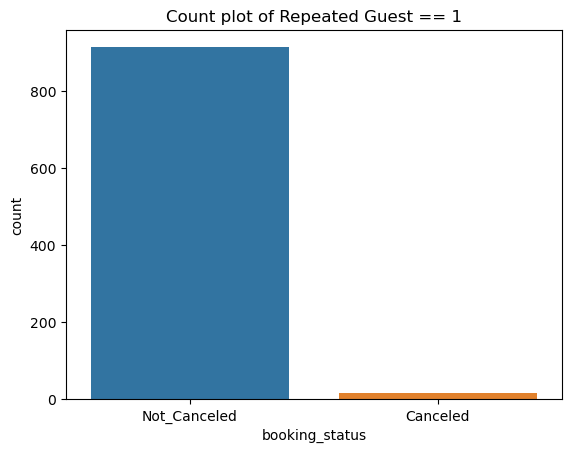

In [18]:
# Count plot of relationship between repeating guests and booking status
sns.countplot(data = df[df['repeated_guest'] == 1], x = 'booking_status')
plt.title('Count plot of Repeated Guest == 1')
plt.show()

Based on the count plot of repeating guests, it is clear that the chances of a repeating guest cancelling their booking is very low compared to non-repeating guests.

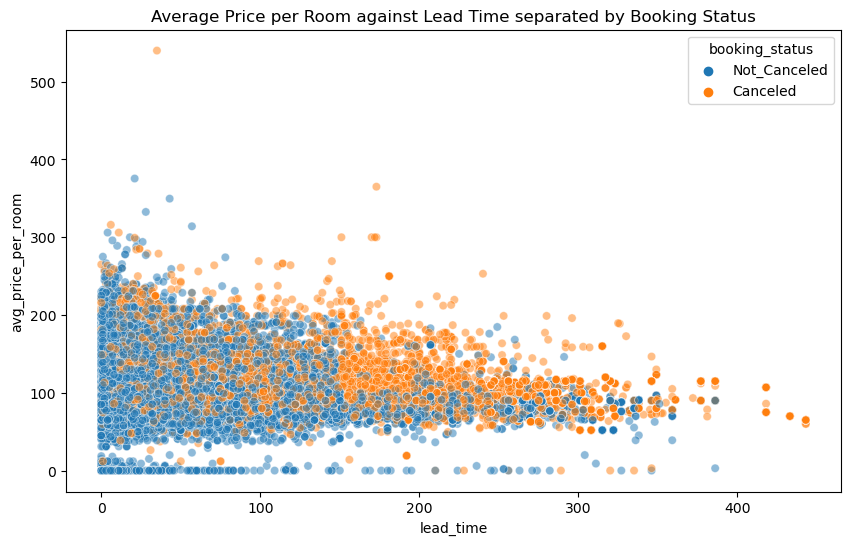

In [19]:
# Average room price against lead time separated by booking status
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = 'lead_time', y = 'avg_price_per_room', hue = 'booking_status', alpha = 0.5)
plt.title('Average Price per Room against Lead Time separated by Booking Status');

Based on the scatter plot of average room price against lead time separated by booking status, we can see that the average room price increases as the lead time decrease.

### <a id='Data_Correlation' href=#1> Data Correlation </a>

In this section, we will look at the correlation between the features and label.

In [20]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Converting categorical features to dummy variables:

Labels:
- 0: Canceled
- 1: Not_Canceled

In [21]:
# For low feature count: map features with 2 unique values to 0 and 1 and get dummy
# For huge feature count: drop first column of dummies
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

# Categorical features of binary values to be mapped
df_dummy = df.copy()
df_dummy['booking_status'] = label_enc.fit_transform(df_dummy['booking_status'])
# df_dummy['booking_status'] = df_dummy['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1}) # To manually map labels according to preference

# Get dummies for remaining categorical features
df_dummy = pd.get_dummies(df_dummy)
df_dummy.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
# Feature correlation to label
df_corr = df_dummy.corr()['booking_status'].sort_values()[:-1]
pd.DataFrame(data = df_corr.values, index = df_corr.index, columns = ['Correlation to booking_status'])

,Correlation to booking_status
lead_time,-0.438538
arrival_year,-0.179529
avg_price_per_room,-0.142569
market_segment_type_Online,-0.106362
no_of_week_nights,-0.092996
no_of_adults,-0.086920
type_of_meal_plan_Meal Plan 2,-0.086370
no_of_weekend_nights,-0.061563
no_of_children,-0.033078
room_type_reserved_Room_Type 6,-0.032652


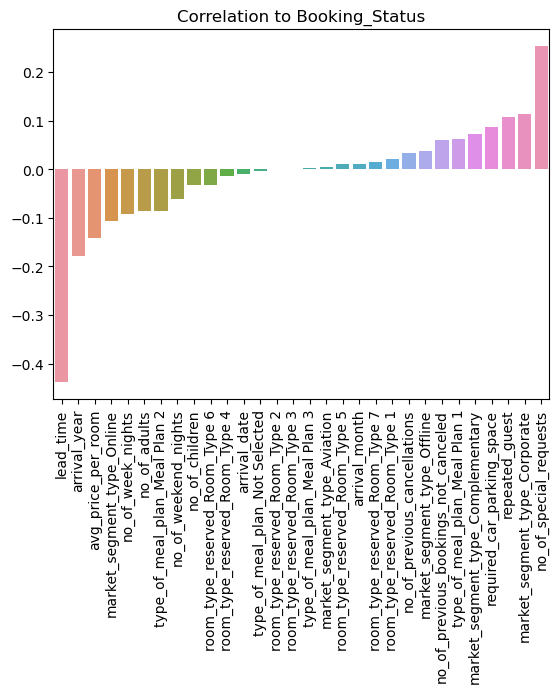

In [23]:
# Feature correlation to label
sns.barplot(x = df_corr.index, y = df_corr.values)
plt.title('Correlation to Booking_Status')
plt.xticks(rotation = 90);

To have a clear order on feature correlation to label, we will plot the bar plot using absolute values:

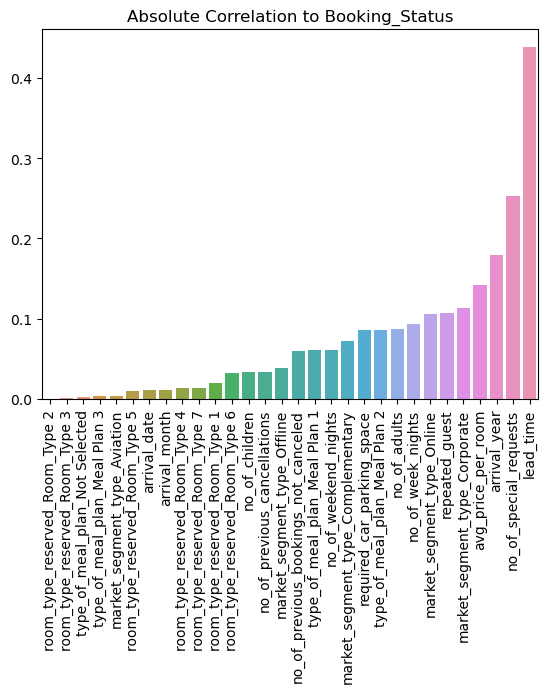

In [24]:
df_corr_abs = abs(df_dummy.corr())['booking_status'].sort_values()[:-1]
pd.DataFrame(data = df_corr_abs.values, index = df_corr_abs.index, columns = ['Absolute Correlation to booking_status'])

sns.barplot(x = df_corr_abs.index, y = df_corr_abs.values)
plt.title('Absolute Correlation to Booking_Status')
plt.xticks(rotation = 90);

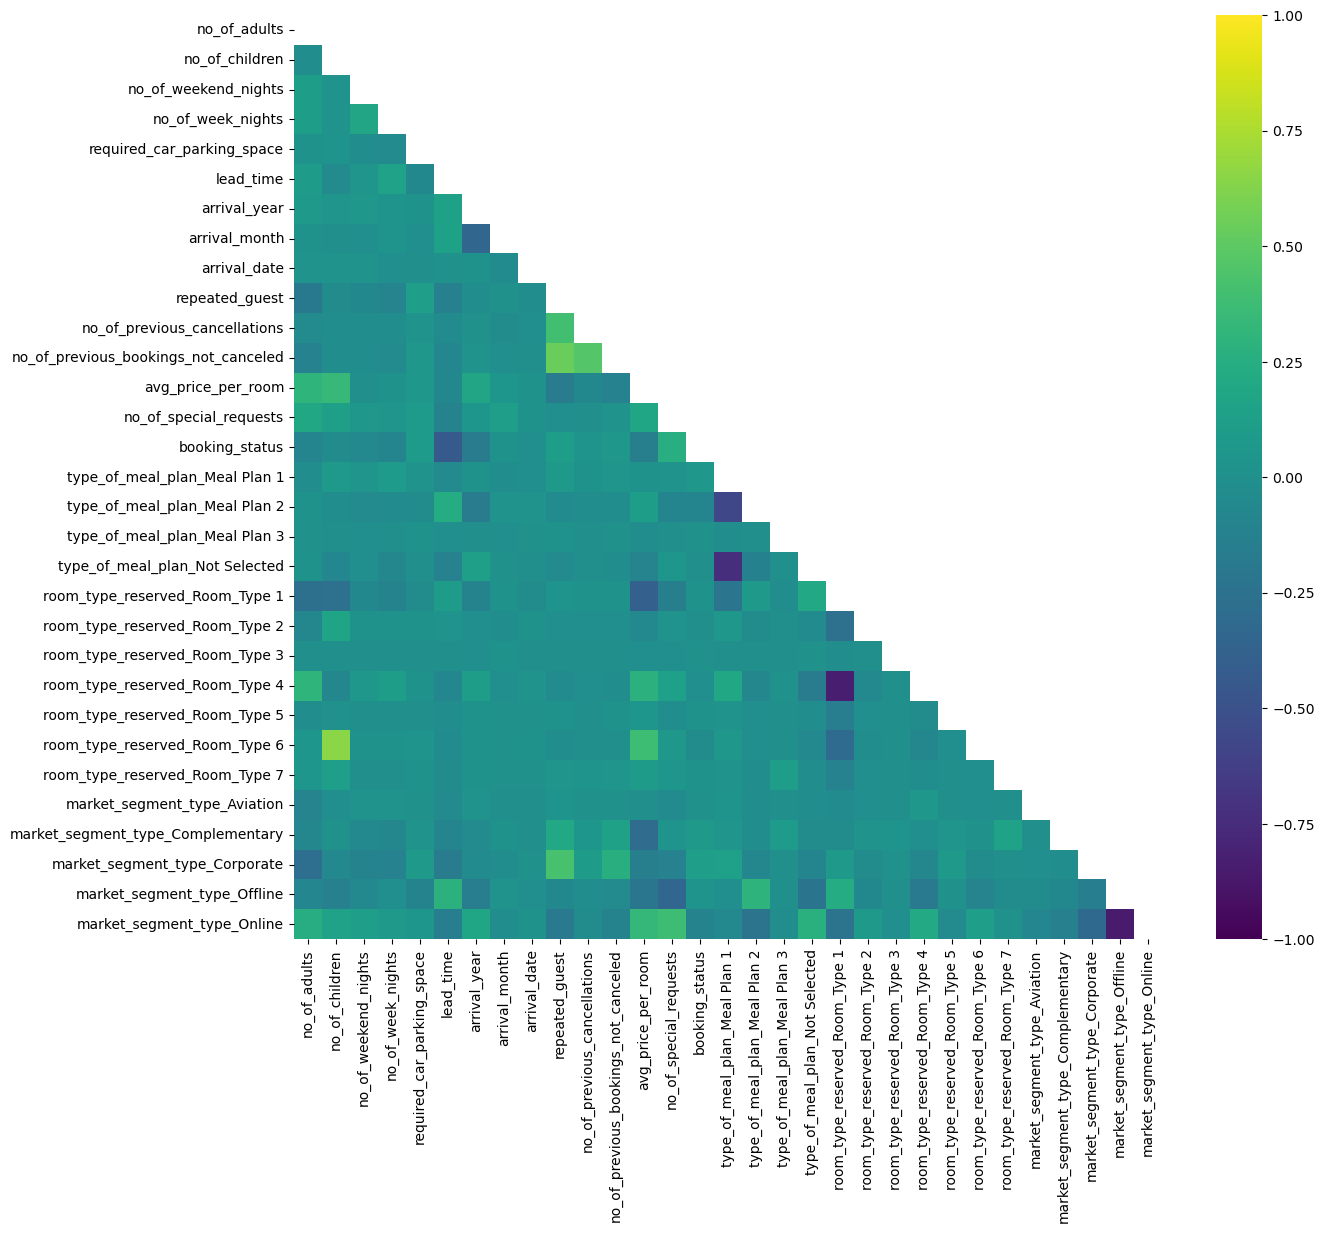

In [25]:
# Correlation between features
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df_dummy.corr())

plt.figure(figsize = (14, 12))
sns.heatmap(data = df_dummy.corr(), mask = matrix, cmap = 'viridis', vmin=-1, vmax=1);

Observation:
- As predicted during EDA, it can be seen that the **lead time and number of special requests** has the highest negative and positive correlation of -0.44 and 0.25 to the charges.
- The **arrival year, average price per room, corporate bookings, repeating guests status and online bookings** have a correlation between 0.1 - 0.2 to the labels.
- The rest of the features are quite insignificant to the booking status.

## <a id='Data_Preparation' href=#1> Data Preparation </a>

In this section, we will prepare the data and define some functions to be used for model development.

In [26]:
X = df_dummy.drop('booking_status', axis = 1)
y = df['booking_status']

In [27]:
# Train/validation/test split
from sklearn.model_selection import train_test_split

# Split train-test once if using GridSearchCV, else split train-validation-holdout test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [28]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [29]:
# Function to print classification report and confusion matrix
# [for XGB] optional_array_classes = np.array(['Label 0', 'Label 1'], dtype = object)
def model_report(model, prediction, *, optional_array_classes = None):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
    
    if optional_array_classes is None:
        optional_array_classes = model.classes_
    else:
        pass
    
    print(classification_report(y_test, prediction))
    cm = confusion_matrix(y_test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = optional_array_classes)
    disp.plot()

In [30]:
# Function to create comparison DF of accuracy score and f1-score for different models
# model_lst = list of model names ['grid_log', 'grid_knn', 'grid_rfc', 'grid_svc', 'grid_gb', 'grid_ab', 'gnb']
# All y_test and all y_pred_(model_lst) variables must be defined
def error_compare_classification_binary(model_lst):
    from sklearn.metrics import accuracy_score, f1_score
    columns = ['Accuracy Score (higher better)', 'F1-Score [Canceled] (closer to 1 better)', 'F1-Score [Not_Canceled] (closer to 1 better)']
    data_lst = []

    for model in model_lst:
        temp_lst = []
        y_pred_func = globals()[f'y_pred_{model}']
        temp_lst.append(accuracy_score(y_test, y_pred_func))
        temp_lst.append(f1_score(y_test, y_pred_func, pos_label = 'Canceled')) # pos_label = 0 & 1 for binary
        temp_lst.append(f1_score(y_test, y_pred_func, pos_label = 'Not_Canceled'))
        data_lst.append(temp_lst)

    return pd.DataFrame(data = data_lst, index = model_lst, columns = columns)

## <a id='Model_Development' href=#1> Model Development </a>

The model will be developed using the processed data. Multiple machine learning algorithms will be used while tuning the hyperparameters to ensure the best model is developed.

### <a id='Logistic_Regression_with_GridSearch_(grid_log)' href=#1> Logistic Regression with GridSearch (grid_log) </a>

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log = LogisticRegression(max_iter = 5000)
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
param_grid_log = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C}

grid_log = GridSearchCV(log, param_grid_log)
grid_log.fit(scaled_X_train, y_train)
grid_log.best_params_
# grid_log.get_params()

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l2'}

Ridge penalty (l2) which performs regularization to improve generalization of the model is deemed suitable for this dataset.

In [32]:
y_pred_grid_log = grid_log.predict(scaled_X_test)
grid_log.predict_proba(scaled_X_test)

array([[1.80843186e-01, 8.19156814e-01],
       [4.85895735e-03, 9.95141043e-01],
       [3.05242568e-04, 9.99694757e-01],
       ...,
       [3.11525018e-01, 6.88474982e-01],
       [2.60369525e-01, 7.39630475e-01],
       [6.90093014e-01, 3.09906986e-01]])

              precision    recall  f1-score   support

    Canceled       0.74      0.63      0.68      3517
Not_Canceled       0.83      0.89      0.86      7366

    accuracy                           0.81     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.81      0.80     10883



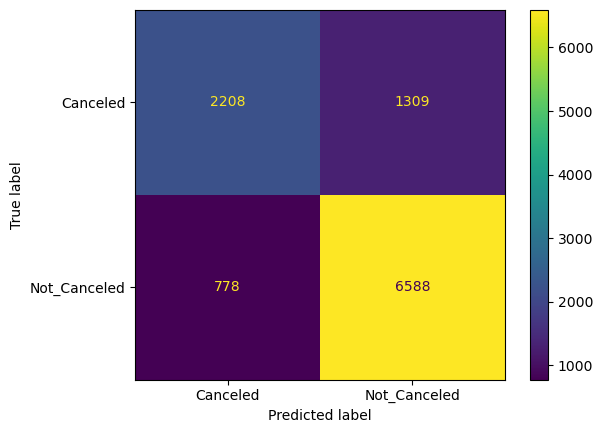

In [33]:
model_report(grid_log, y_pred_grid_log)

### <a id='KNN_with_GridSearch_(grid_knn)' href=#1> KNN with GridSearch (grid_knn) </a>

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
n_neighbors = list(range(1, 30))
param_grid_knn = {'n_neighbors': n_neighbors}

grid_knn = GridSearchCV(knn, param_grid_knn)
grid_knn.fit(scaled_X_train, y_train)
# grid_knn.best_estimator_.get_params()
grid_knn.best_params_

{'n_neighbors': 3}

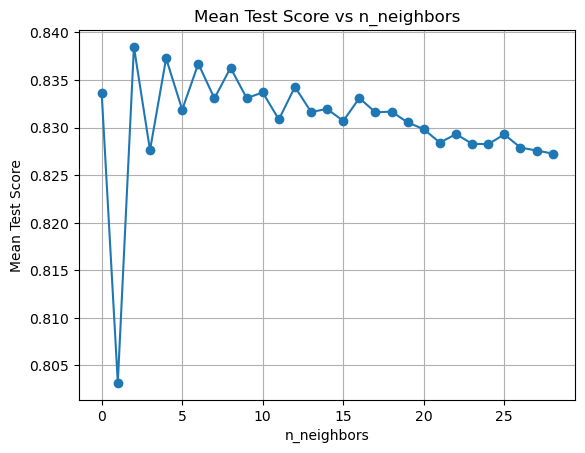

In [35]:
pd.DataFrame(grid_knn.cv_results_)['mean_test_score'].plot(marker = 'o')
plt.title('Mean Test Score vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show();

The n_neighbors (k) value with highest mean test score is k = 2. To avoid ties in classification, the next odd number of k = 3 is chosen for the KNN model.

              precision    recall  f1-score   support

    Canceled       0.77      0.74      0.76      3517
Not_Canceled       0.88      0.90      0.89      7366

    accuracy                           0.85     10883
   macro avg       0.83      0.82      0.82     10883
weighted avg       0.85      0.85      0.85     10883



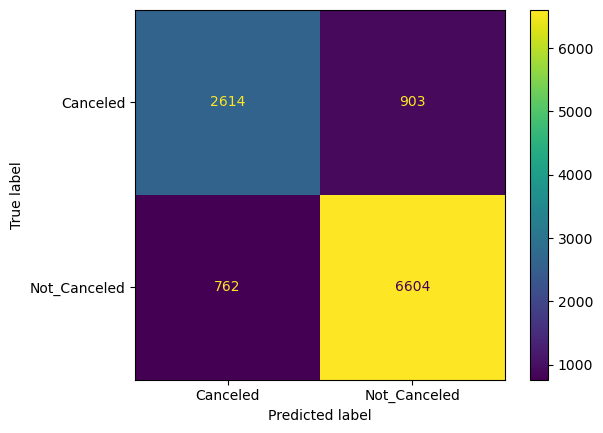

In [36]:
y_pred_grid_knn = grid_knn.predict(scaled_X_test)
model_report(grid_knn, y_pred_grid_knn)

### <a id='Random_Forest_Classifier_with_GridSearch_(grid_rfc)' href=#1> Random Forest Classifier with GridSearch (grid_rfc) </a>

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
n_estimators = [64, 100, 128, 200]
max_features = ["sqrt", "log2", None]
bootstrap = [True, False]
oob_score = [True, False]
param_grid_rfc = {'n_estimators': n_estimators, 'max_features': max_features, 'bootstrap': bootstrap, 'oob_score': oob_score}

grid_rfc = GridSearchCV(rfc, param_grid_rfc)
grid_rfc.fit(scaled_X_train, y_train)
grid_rfc.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'oob_score': True}

              precision    recall  f1-score   support

    Canceled       0.88      0.81      0.84      3517
Not_Canceled       0.91      0.94      0.93      7366

    accuracy                           0.90     10883
   macro avg       0.89      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883



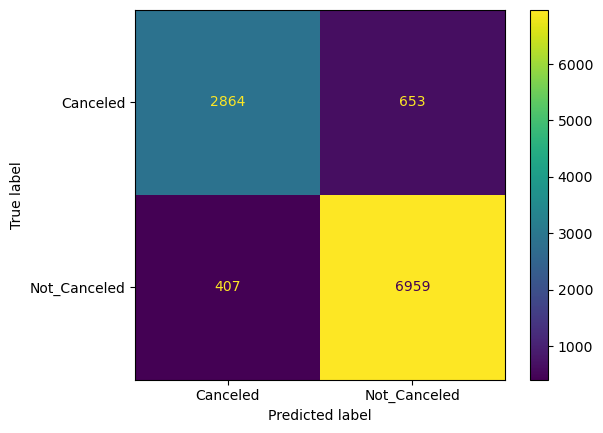

In [38]:
y_pred_grid_rfc = grid_rfc.predict(scaled_X_test)
model_report(grid_rfc, y_pred_grid_rfc)

### <a id='SVC_with_GridSearch_(grid_svc)' href=#1> SVC with GridSearch (grid_svc) </a>

In [39]:
from sklearn.svm import SVC

svc = SVC()
C = [1, 10, 100]
kernel = ['rbf']
gamma = ['scale']
degree = [1, 2]
param_grid_svc = {'C': C, 'kernel': kernel, 'gamma': gamma, 'degree': degree}

grid_svc = GridSearchCV(svc, param_grid_svc)
grid_svc.fit(scaled_X_train, y_train)
grid_svc.best_params_

{'C': 100, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

              precision    recall  f1-score   support

    Canceled       0.82      0.75      0.78      3517
Not_Canceled       0.88      0.92      0.90      7366

    accuracy                           0.86     10883
   macro avg       0.85      0.83      0.84     10883
weighted avg       0.86      0.86      0.86     10883



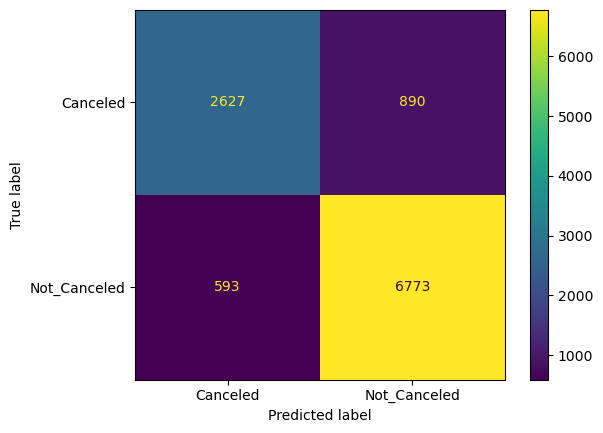

In [40]:
y_pred_grid_svc = grid_svc.predict(scaled_X_test)
model_report(grid_svc, y_pred_grid_svc)

### <a id='Gradient_Boost_with_GridSearch_(grid_gb)' href=#1> Gradient Boost with GridSearch (grid_gb) </a>

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
n_estimators = [50, 100, 200, 300, 400]
learning_rate = [0.05, 0.01, 0.1, 0.5, 1.0]
max_depth = [3, 4, 5]
param_grid_gb = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth}

grid_gb = GridSearchCV(gb, param_grid_gb)
grid_gb.fit(scaled_X_train, y_train)
grid_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}

              precision    recall  f1-score   support

    Canceled       0.87      0.80      0.83      3517
Not_Canceled       0.91      0.94      0.92      7366

    accuracy                           0.90     10883
   macro avg       0.89      0.87      0.88     10883
weighted avg       0.89      0.90      0.89     10883



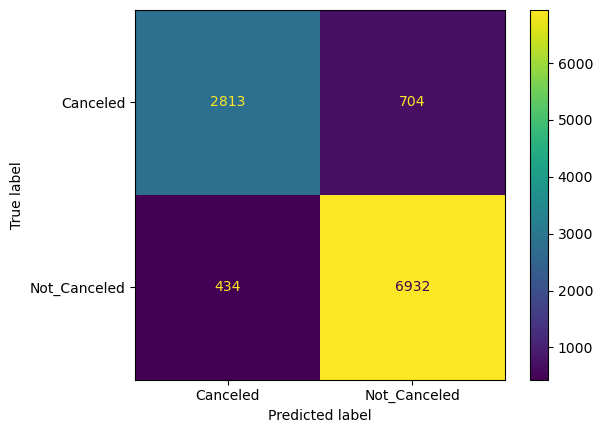

In [42]:
y_pred_grid_gb = grid_gb.predict(scaled_X_test)
model_report(grid_gb, y_pred_grid_gb)

Improving the model slightly:

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gb2 = GradientBoostingClassifier()
n_estimators = [400, 500]
learning_rate = [0.1]
max_depth = [5, 6]
param_grid_gb2 = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth}

grid_gb2 = GridSearchCV(gb2, param_grid_gb2)
grid_gb2.fit(scaled_X_train, y_train)
grid_gb2.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}

              precision    recall  f1-score   support

    Canceled       0.87      0.82      0.84      3517
Not_Canceled       0.91      0.94      0.93      7366

    accuracy                           0.90     10883
   macro avg       0.89      0.88      0.88     10883
weighted avg       0.90      0.90      0.90     10883



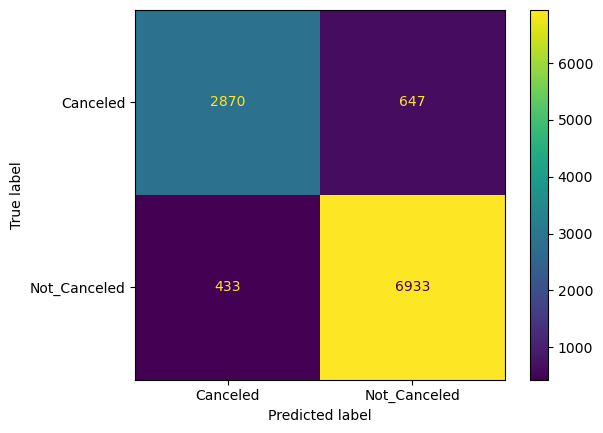

In [44]:
y_pred_grid_gb2 = grid_gb2.predict(scaled_X_test)
model_report(grid_gb2, y_pred_grid_gb2)

### <a id='AdaBoost_with_GridSearch_(grid_ab)' href=#1> AdaBoost with GridSearch (grid_ab) </a>

In [45]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
n_estimators = list(range(450, 551))
param_grid_ab = {'n_estimators': n_estimators}

grid_ab = GridSearchCV(ab, param_grid_ab)
grid_ab.fit(scaled_X_train, y_train)
grid_ab.best_params_

{'n_estimators': 502}

              precision    recall  f1-score   support

    Canceled       0.77      0.70      0.73      3517
Not_Canceled       0.86      0.90      0.88      7366

    accuracy                           0.83     10883
   macro avg       0.81      0.80      0.81     10883
weighted avg       0.83      0.83      0.83     10883



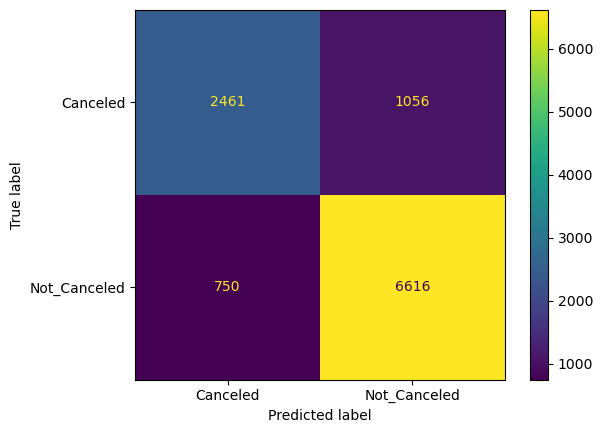

In [46]:
y_pred_grid_ab = grid_ab.predict(scaled_X_test)
model_report(grid_ab, y_pred_grid_ab)

### <a id='Extreme_Gradient_Boost_with_GridSearch_(grid_xgb)' href=#1> Extreme Gradient Boost with GridSearch (grid_xgb) </a>

In [47]:
from xgboost import XGBClassifier

# encode to numeric for XGB
y_train_enc = y_train.map({'Canceled': 0, 'Not_Canceled': 1})

xgb = XGBClassifier()
learning_rate = [0.01, 0.1, 0.2]
n_estimators = [50, 100, 200]
max_depth = [3, 5, 7]
min_child_weight = [1, 3, 5]
subsample = [0.8, 0.9, 1.0]
colsample_bytree = [0.8, 0.9, 1.0]
param_grid_xgb = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_child_weight': min_child_weight, 'subsample': subsample, 'colsample_bytree': colsample_bytree}

grid_xgb = GridSearchCV(xgb, param_grid_xgb)
grid_xgb.fit(scaled_X_train, y_train_enc)
grid_xgb.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 1.0}

              precision    recall  f1-score   support

    Canceled       0.87      0.81      0.84      3517
Not_Canceled       0.91      0.94      0.93      7366

    accuracy                           0.90     10883
   macro avg       0.89      0.88      0.88     10883
weighted avg       0.90      0.90      0.90     10883



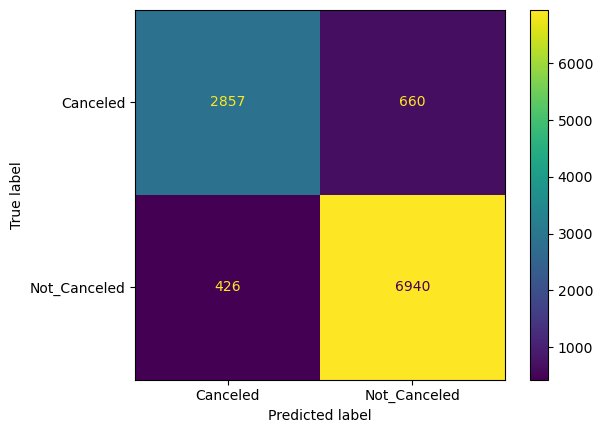

In [48]:
y_pred_grid_xgb = grid_xgb.predict(scaled_X_test)

# invert encode to category label
invert_enc_dict = {0: 'Canceled', 1: 'Not_Canceled'}
y_pred_grid_xgb = np.array([invert_enc_dict[val] for val in y_pred_grid_xgb])

# insert optional_array_class for model_report function
model_report(grid_xgb, y_pred_grid_xgb, optional_array_classes = np.array(['Canceled', 'Not_Canceled'], dtype = object))


### <a id='Gaussian_NB_(gnb)' href=#1> Gaussian NB (gnb) </a>

In [49]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(scaled_X_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

    Canceled       0.35      0.97      0.51      3517
Not_Canceled       0.91      0.13      0.23      7366

    accuracy                           0.40     10883
   macro avg       0.63      0.55      0.37     10883
weighted avg       0.73      0.40      0.32     10883



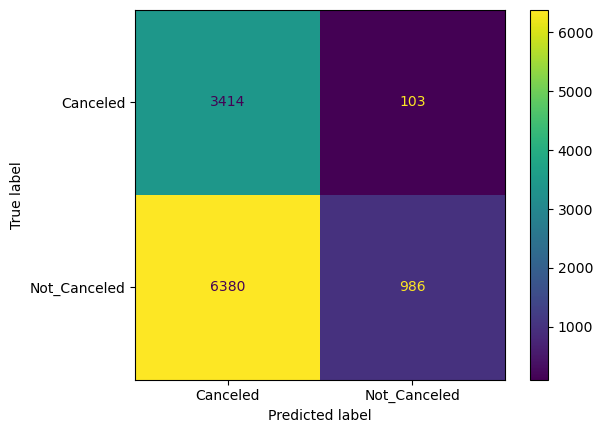

In [50]:
y_pred_gnb = gnb.predict(scaled_X_test)
model_report(gnb, y_pred_gnb)

## <a id='Model_Comparison' href=#1> Model Comparison </a>

Comparison of error and R^2 scores for different algorithms.
- Accuracy: Ratio of correct prediction count (TP + TN) by total predictions made.
- Precision: Ratio of TP count to total TP count made by model.
- Recall: Ratio of TP count to total actual positive count.
- F1-Score: Sensitive to low values, will only be high when precision and recall is high.

In [51]:
index = ['grid_log', 'grid_knn', 'grid_rfc', 'grid_svc', 'grid_gb', 'grid_gb2', 'grid_ab', 'grid_xgb', 'gnb']
df_error_compare = error_compare_classification_binary(index) # self defined function
df_error_compare

,Accuracy Score (higher better),F1-Score [Canceled] (closer to 1 better),F1-Score [Not_Canceled] (closer to 1 better)
grid_log,0.808233,0.679071,0.863264
grid_knn,0.847009,0.758451,0.888052
grid_rfc,0.902600,0.843842,0.929230
grid_svc,0.863732,0.779872,0.901324
grid_gb,0.895433,0.831756,0.924143
grid_gb2,0.900763,0.841642,0.927740
grid_ab,0.834053,0.731570,0.879904
grid_xgb,0.900211,0.840294,0.927436
gnb,0.404300,0.512959,0.233235


Sorting the dataframe to view the best model for each categories.

In [52]:
print('Sorted by best Accuracy Score:')
df_error_compare.sort_values('Accuracy Score (higher better)', ascending = False)

Sorted by best Accuracy Score:


,Accuracy Score (higher better),F1-Score [Canceled] (closer to 1 better),F1-Score [Not_Canceled] (closer to 1 better)
grid_rfc,0.902600,0.843842,0.929230
grid_gb2,0.900763,0.841642,0.927740
grid_xgb,0.900211,0.840294,0.927436
grid_gb,0.895433,0.831756,0.924143
grid_svc,0.863732,0.779872,0.901324
grid_knn,0.847009,0.758451,0.888052
grid_ab,0.834053,0.731570,0.879904
grid_log,0.808233,0.679071,0.863264
gnb,0.404300,0.512959,0.233235


In [53]:
print('Sorted by best F1-Score [Canceled]:')
df_error_compare.sort_values('F1-Score [Canceled] (closer to 1 better)', ascending = False)

Sorted by best F1-Score [Canceled]:


,Accuracy Score (higher better),F1-Score [Canceled] (closer to 1 better),F1-Score [Not_Canceled] (closer to 1 better)
grid_rfc,0.902600,0.843842,0.929230
grid_gb2,0.900763,0.841642,0.927740
grid_xgb,0.900211,0.840294,0.927436
grid_gb,0.895433,0.831756,0.924143
grid_svc,0.863732,0.779872,0.901324
grid_knn,0.847009,0.758451,0.888052
grid_ab,0.834053,0.731570,0.879904
grid_log,0.808233,0.679071,0.863264
gnb,0.404300,0.512959,0.233235


In [54]:
print('Sorted by best F1-Score [Not_Canceled]:')
df_error_compare.sort_values('F1-Score [Not_Canceled] (closer to 1 better)', ascending = False)

Sorted by best F1-Score [Not_Canceled]:


,Accuracy Score (higher better),F1-Score [Canceled] (closer to 1 better),F1-Score [Not_Canceled] (closer to 1 better)
grid_rfc,0.902600,0.843842,0.929230
grid_gb2,0.900763,0.841642,0.927740
grid_xgb,0.900211,0.840294,0.927436
grid_gb,0.895433,0.831756,0.924143
grid_svc,0.863732,0.779872,0.901324
grid_knn,0.847009,0.758451,0.888052
grid_ab,0.834053,0.731570,0.879904
grid_log,0.808233,0.679071,0.863264
gnb,0.404300,0.512959,0.233235


Observation:
1. grid_rfc has the highest accuracy score and F1-score out of all the algorithms. Meaning it is the most accurate in predicting the labels of the dataset, with an accuracy score of 90.3% and F1-scores of 84.4% and 92.9% for 'Canceled' and 'Not_Canceled'.
2. grid_gb2 and grid_xgb have the 2nd and 3rd highest accuracy and F1-scores. However, the scores are almost identical to grid_rfc with fractional differences.
3. The difference in accuracy and F1-scores between the remaining algorithms and the top 3 are above 4%.
4. By comparing the top 3 scores, they are practically similar. However, the extreme gradient boost (grid_xgb) algorithm is the fastest by a sizeable margin, followed by random forest classifier (grid_rfc) and lastly gradient boost (grid_gb2). Hence, although grid_rfc is ranked 1st in accuracy and F1-score, the **best model for this dataset would be grid_xgb.**

## <a id='Conclusion' href=#1> Conclusion </a>

Based on the results of this project, we can conclude that:
1. By performing EDA, we determined that **lead time and number of special requests by guests are the most crucial factors affecting the room cancellation rate**. The chances of a booking getting cancelled is higher when the lead time of bookings are higher with lesser special requests.
2. The **average price per room, status of repeating guests and booking methods especially corporate and online bookings** are also indicators for room cancellations albeit with lesser effect.
3. The **most common bookings are online bookings by first timers for 2 adults with 0 children, selecting room type 1 and meal plan 1.**
4. **Room type 3 and meal plan 3 are barely chosen** by guests.
5. The months of **August to October are peak season** while **January to March are off season.**
6. For this project, the priority would be detecting the canceled bookings. It would be more costly if we can't detect the potential canceled bookings rather than misclassifying the non-canceled bookings. Hence, the **recall percentage for 'Canceled' is prioritized in model evaluation**.
7. Based on the evaluation methods, the **best model is the Extreme Gradient Boost (grid_xgb) model** as it has one of the **highest accuracy (90%)** and **F1-scores (84% & 92.7%)** and is the **fastest running model**. Besides, grid_xgb has the **highest recall for 'Canceled' at 81%**. (Gaussian NB/gnb is disregarded as its precision rate is only 35%, meaning the recall is high due to classifying most data as 'Canceled'.)

## <a id='Recommendation' href=#1> Recommendation </a>

From the conclusions made, I will recommend that:
1. The hotel should expect some cancellations from bookings which still have a high lead time. Hotels should be aware of cancellation policies by hotel booking platforms they enroll in which typically allows free cancellation before a certain period. The hotel should then only **plan for these bookings when the free cancellation period is over** as the potential losses sustained by the hotel due to cancellations can then be covered by the cancellation fees.
2. The hotel should **try their best within their means to cater to guests' special requests** as it is highly likely that guests will not cancel their bookings if the requests are met. This might be due to guests planning special arrangements to celebrate special occations or surprises. Hence, if these can be met, they will be unlikely to cancel.
3. **Large scale corporate bookings** should require a **deposit which is non-refundable if cancelled.**
4. There should be some **incentive for returning guests or membership system with benefits** to retain and encourage guests to rebook their stay with the hotel in the future as repeating guests usually won't cancel their bookings, meaning higher potential profit for the hotel.
5. To reduce opportunity losses from last minute cancellations, the hotel should **remove meal plan 3** from the menu to prevent wastages and **convert room type 3 into type 1** as the amount of guests selecting this menu and room does not justify having it as an alternate option. By removing menu 3 and converting into room type 1, it will be **easier to obtain new customers in the event of last minute cancellations** as these selections are the most popular.
6. During **off season (Jan - Mar), the hotel should offer promotions or organize special events** in order to attract guests to stay at the hotel to increase profits. **Special corporate promotions** could also be given to companies organizing events at the hotel during the off season as the hotel is able to cater to the huge capacity during off season.
7. During **peak season (Aug - Oct), the hotel could offer attractive package deals which includes additional services or amenities** which encourage guests to purchase higher priced packages instead, further increasing the profit. **Collaborations with local businesses** to create combined packages or **small business owners** to set-up promotional booths within the hotel compound could also be done to increase the revenue stream.

## <a id='Final_Model_Deployment' href=#1> Final Model Deployment </a>

Create the final model with the best hyperparameters and fit the model with whole dataset.

In [55]:
# Create best model:
final_model_xgb = XGBClassifier(learning_rate = 0.2, n_estimators = 200, max_depth = 7, min_child_weight = 1, subsample = 1.0, colsample_bytree = 0.8)
scaled_X = scaler.transform(X)
y_enc = y.map({'Canceled': 0, 'Not_Canceled': 1}) # encode to numeric for XGB
final_model_xgb.fit(scaled_X, y_enc)

# Create a pipeline which fitted scaler and model:
from sklearn.pipeline import Pipeline
final_pipeline = Pipeline([('scaler', scaler), ('model', final_model_xgb)])

# Save model:
import joblib
joblib.dump(final_pipeline, 'booking_cancellation_model_pipeline.pkl')
joblib.dump(list(X.columns), 'booking_cancellation_col_names.pkl')
joblib.dump(list(df_original.columns[:-1]), 'booking_cancellation_ori_X_col_names.pkl')

# To load model:
# import joblib
# loaded_model = joblib.load('booking_cancellation_model_pipeline.pkl')
# dummy_columns = joblib.load('booking_cancellation_col_names.pkl')
# ori_columns = joblib.load('booking_cancellation_ori_X_col_names.pkl')

# To use model:
# import pandas as pd
# # For 1 list, new_list_data = [['values']]:
# new_list_data = [[]]
# new_data = pd.get_dummies(pd.DataFrame(new_list_data, columns = ori_columns)).reindex(columns = dummy_columns, fill_value = 0)
# loaded_model.predict(new_data) # Output: 0 = 'Canceled', 1 = 'Not_Canceled'
# # # # # # # # # # # # # # # # # # # # # # 
# # For new df, df_new = pd read file:
# df_new = pd.read_excel('example.xlsx')
# new_data = pd.get_dummies(df_new).reindex(columns = dummy_columns, fill_value = 0)
# loaded_model.predict(new_data) # Output: 0 = 'Canceled', 1 = 'Not_Canceled'

['booking_cancellation_col_names.pkl']